# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
df=pd.read_csv('HRV.csv')

In [4]:
df.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [6]:
df.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [8]:
totchol_median=df['totChol'].median()

In [9]:
df['totChol'].fillna(totchol_median, inplace=True)

In [10]:
BMI_median=df['BMI'].median()
df['BMI'].fillna(BMI_median, inplace=True)

In [11]:
heartRate_median=df['heartRate'].median()
df['heartRate'].fillna(heartRate_median, inplace=True)

In [12]:
glucose_median=df['glucose'].median()
df['glucose'].fillna(glucose_median, inplace=True)

In [13]:
df.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

In [14]:
df.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
x=df[['male', 'age', 'currentSmoker', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD']]
y=df[['totChol']]

### Create independent and dependent variables to predict 

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=0)

## Training the Linear Regression model 

In [17]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(x_train.values, y_train)

LinearRegression()

## Model performance check- R Square and RMSE score

In [18]:
y_pred=regressor.predict(x_test.values)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"MSE: {mean_squared_error(y_test, y_pred): .2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R-Square: {r2_score(y_test, y_pred): .2f}")

MSE:  2045.40
RMSE:  45.23
R-Square:  0.06


## Predicting new results where the actual results are given
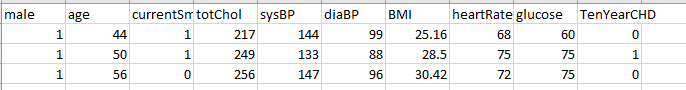

In [20]:
# case 1 actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([[229.38466847]])

In [21]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([[236.92492778]])

In [22]:
# case 3 actual 256
regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

array([[245.14974891]])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

### Create independent and dependent variables to predict

In [26]:
x=df[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]
y=df[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=0,stratify=y)

## Training the Logistic Regression model 

In [28]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(max_iter=1000)
classifier.fit(x_train.values, y_train)

/Users/brandonboyle/opt/anaconda3/envs/DS-160-01/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [29]:
y_pred=classifier.predict(x_test.values)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [31]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[713   6]
 [118  10]]


In [32]:
classifier.classes_

array([0, 1])

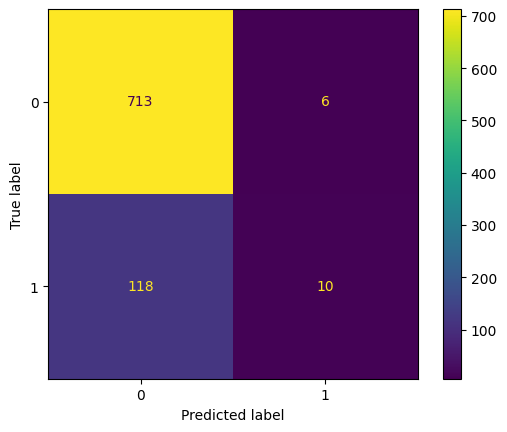

In [33]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

## TN = 714 were predicted to not be at risk, and were not at risk
## FP = 6 were predicted to be at risk, but were not at risk
## FN = 123 were predicted to not be at risk, but were at risk
## TP = 4 were predicted to be at risk, and were at risk



In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.62      0.08      0.14       128

    accuracy                           0.85       847
   macro avg       0.74      0.53      0.53       847
weighted avg       0.82      0.85      0.80       847



### Accuracy = 85%

## Predicting new results where the actual results are given
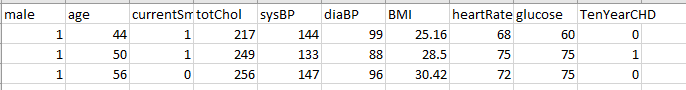

In [36]:
y_pred=classifier.predict(x_test.values)

In [37]:
classifier.predict([[1,44,1,217,144,99,25.16,68,60]])

array([0])

In [38]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75]])

array([0])

In [39]:
classifier.predict([[1,56,0,256,147,96,30.42,72,75]])

array([0])

### Summary

In summary the data showed that the logistical predictions were less accurate than teh linear predictions. The confusion matrix for the logistical model found more true negatives than the other three options. However there were also a lot of false negatives in the matrix as well. The linear model has a fairly week r-squared with .06 and this makes it an imbalanced dataset as there are more 0s than 1s, making it hard to correctly predict a 1.
